# Necessary Packages

In [1]:
import pandas as pd                                    #package for data analysis
import numpy as np                                     #package for handling arrays
from sklearn.cluster import KMeans                     #importing kmean for clustering
from sklearn.metrics import silhouette_score           #importing Silhouette Score
from sklearn.mixture import GaussianMixture            #importing Gaussian Mixture
import matplotlib.pyplot as plt                        #importing matplotlib for visualization

# Reading the Datasets

In [2]:
#reading the glass data and assigning feature names
glass_data = pd.read_csv('glassData.csv'
                         ,names=['f1','f2','f3','f4','f5','f6','f7','f8','f9','class'])

In [3]:
#reading the yeast data and assigning feature names
yeast_data = pd.read_csv('yeastData.csv'
                         ,names=['f1','f2','f3','f4','f5','f6','f7','f8','class'])

### Datasets

In [4]:
dataset_name=['glass','yeast']

# KMean Clustering

In [49]:
def kmean_clustering():
    h=0
    # Function to calculate SSE for a given k value
    def calculate_sse(data, k):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        return kmeans.inertia_

    # Function to calculate silhouette score for a given k value
    def calculate_silhouette_score(data, k):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        return silhouette_score(data, labels)

    # Function to plot SSE vs. k
    def plot_sse_vs_k(dataset_name, k_values, sse_values):
        plt.plot(k_values, sse_values, marker='o')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Sum of Squared Error (SSE)')
        plt.title(f'SSE vs. k - {dataset_name}')
        plt.show()

    # Apply k-means clustering and evaluate for each dataset
    datasets = [(glass_data, glass_k_values),(yeast_data,yeast_k_values)]

    for dataset, k_values in datasets:
        sse_values = []
        silhouette_scores = []
        value_k=[]

        for k in k_values:
            sse = calculate_sse(dataset, k)
            silhouette = calculate_silhouette_score(dataset, k)
            sse_values.append(sse)
            silhouette_scores.append(silhouette)
            value_k.append(k)

        # Plot SSE vs. k
        plot_sse_vs_k(dataset_name=dataset_name[h], k_values=k_values, sse_values=sse_values)
        
        # Plot silhouette index vs k
        plt.plot(k_values, silhouette_scores, marker='o')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Silhouette Index')
        plt.title('Silhouette Index vs k')
        plt.show()
        
        df=pd.DataFrame([k_values,sse_values,silhouette_scores]).T
        df.columns=['K','SSE','Silhouette']
        print(df)
        print()
        print('----------------------------------------------------------------------')
        # Find the optimal k based on silhouette score
        optimal_k = k_values[np.argmax(silhouette_scores)]
        optimal_sse = sse_values[optimal_k - min(k_values)]
        ind=np.argmax(silhouette_scores)

        print(f'Optimal k for {dataset_name[h]}: {optimal_k}')
        print(f'SSE for optimal k: {optimal_sse}\n')
        print()
        print('----------------------------------------------------------------------')
        print(f'Optimal Silhouette Scores: {silhouette_scores[ind]}\n')
        h=h+1
        print()
        print('----------------------------------------------------------------------')



# 1- k starting from 2 to number of classes + 2 

In [50]:
glass_num_classes = len(glass_data['class'].unique())

In [51]:
glass_k_values = range(2, glass_num_classes + 3)   # value of k+2 more than classes

In [52]:
yeast_num_classes = len(yeast_data['class'].unique())

In [53]:
yeast_k_values = range(2, yeast_num_classes + 3) # value of k+2 more than classes

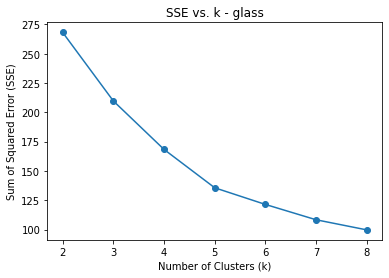

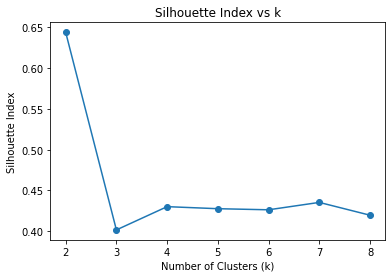

     K         SSE  Silhouette
0  2.0  268.261944    0.644091
1  3.0  209.755946    0.401607
2  4.0  168.387657    0.430144
3  5.0  135.655465    0.427628
4  6.0  121.446109    0.426295
5  7.0  108.373150    0.435358
6  8.0   99.742572    0.419642

----------------------------------------------------------------------
Optimal k for glass: 2
SSE for optimal k: 268.26194427561137


----------------------------------------------------------------------
Optimal Silhouette Scores: 0.6440907143050616


----------------------------------------------------------------------


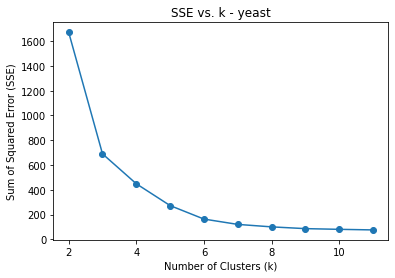

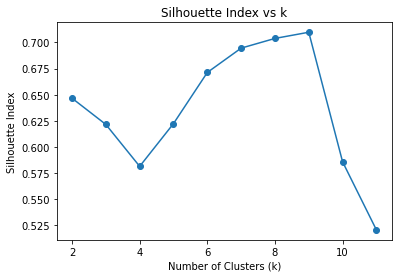

      K          SSE  Silhouette
0   2.0  1671.614976    0.646603
1   3.0   690.495531    0.621493
2   4.0   448.974372    0.581406
3   5.0   272.952390    0.622325
4   6.0   164.075384    0.671259
5   7.0   121.135286    0.694529
6   8.0   101.186094    0.703820
7   9.0    86.966021    0.709737
8  10.0    81.319506    0.585760
9  11.0    76.613623    0.520589

----------------------------------------------------------------------
Optimal k for yeast: 9
SSE for optimal k: 86.9660213711265


----------------------------------------------------------------------
Optimal Silhouette Scores: 0.7097368412361774


----------------------------------------------------------------------


In [54]:
kmean_clustering()

# 2 - The number of clusters equal to the number of classe

In [39]:
glass_num_classes = len(glass_data['class'].unique())
glass_k_values = range(2, glass_num_classes)

In [40]:
yeast_num_classes = len(yeast_data['class'].unique())
yeast_k_values = range(2, yeast_num_classes)

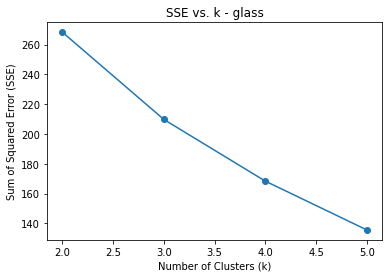

Optimal k for glass: 2
SSE for optimal k: 268.26194427561137

Optimal Silhouette Scores: 0.6440907143050616



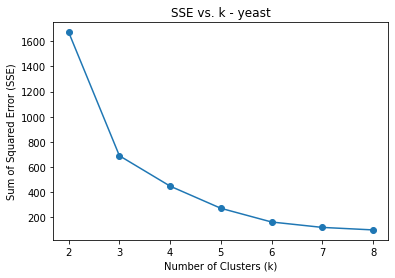

Optimal k for yeast: 8
SSE for optimal k: 101.1860943711265

Optimal Silhouette Scores: 0.7038204401804479



In [41]:
kmean_clustering()

# Gaussian Mixture Models

In [69]:
#reading the simulatedX data and assigning feature names
simulatedX_data = pd.read_csv('simulatedX.csv',names=['f1','f2'])

In [70]:
#reading the simulatedy data and assigning feature names
simulatedy_data = pd.read_csv('simulatedy.csv',names=['class'])

In [71]:
#merging the both data
df=pd.merge(simulatedX_data,simulatedy_data,on=simulatedX_data.index)

In [72]:
df.drop('key_0',axis=1,inplace=True)

In [73]:
df

,f1,f2,class
0,0.000000,1.000000,0
1,2.312507,0.104505,2
2,1.287683,0.280291,2
3,-5.124604,0.487174,1
4,2.578308,-0.317606,2
...,...,...,...
496,-8.415011,-6.359746,0
497,2.576398,0.358731,2
498,-4.379067,-1.889072,1
499,-9.664963,-3.517327,0


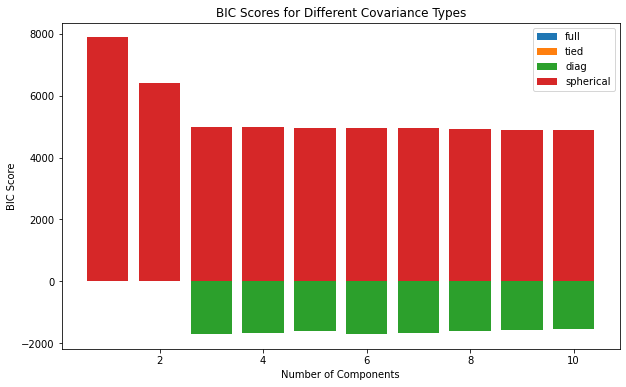

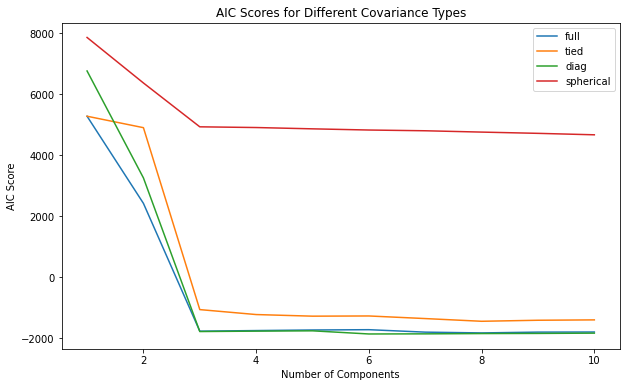

In [61]:
# Try different covariance types and number of components
covariance_types = ['full', 'tied', 'diag', 'spherical']
n_components_range = range(1, 11)

# Initialize empty lists to store BIC and AIC scores
bic_scores = []
aic_scores = []

# Iterate through different covariance types and number of components
for covariance_type in covariance_types:
    bic_scores_row = []
    aic_scores_row = []

    for n_components in n_components_range:
        # Create Gaussian Mixture Model object
        gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=42)

        # Fit the model to the data
        gmm.fit(df)

        # Calculate the Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC)
        bic_score = gmm.bic(df)
        aic_score = gmm.aic(df)

        bic_scores_row.append(bic_score)
        aic_scores_row.append(aic_score)

    bic_scores.append(bic_scores_row)
    aic_scores.append(aic_scores_row)

# Plot BIC scores for different covariance types
plt.figure(figsize=(10, 6))
plt.title('BIC Scores for Different Covariance Types')
for i, covariance_type in enumerate(covariance_types):
    plt.bar(n_components_range, bic_scores[i], label=covariance_type)
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.legend()
plt.show()

# Plot AIC scores for different covariance types
plt.figure(figsize=(10, 6))
plt.title('AIC Scores for Different Covariance Types')
for i, covariance_type in enumerate(covariance_types):
    plt.plot(n_components_range, aic_scores[i], label=covariance_type)
plt.xlabel('Number of Components')
plt.ylabel('AIC Score')
plt.legend()
plt.show()


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

# Load the data
X = df[['f1','f2']]
y = df['class']

# Define the covariance types and number of components to try
covariance_types = ['full', 'tied', 'diag', 'spherical']
n_components_range = range(1, 11)

# Create the parameter grid for GridSearchCV
param_grid = {'covariance_type': covariance_types, 'n_components': n_components_range}

# Create and fit the GridSearchCV object
gmm = GaussianMixture(random_state=42)
grid_search = GridSearchCV(gmm, param_grid=param_grid)
grid_search.fit(X)

# Retrieve the best model from GridSearchCV
best_gmm = grid_search.best_estimator_
print("Best model:", best_gmm)

# Plot the best model
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = best_gmm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.contour(xx, yy, Z, levels=[0.5], colors='red', linewidths=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Best Gaussian Mixture Model')
plt.show()


Best model: GaussianMixture(covariance_type='spherical', n_components=3, random_state=42)


TypeError: '(slice(None, None, None), 0)' is an invalid key

In [75]:
# Define the covariance types and number of components to try
covariance_types = ['full', 'tied', 'diag', 'spherical']
n_components_range = range(1, 11)

# Create the parameter grid for GridSearchCV
param_grid = {'covariance_type': covariance_types, 'n_components': n_components_range}

# Create and fit the GridSearchCV object
gmm = GaussianMixture(random_state=42)
grid_search = GridSearchCV(gmm, param_grid=param_grid)
grid_search.fit(X)

# Retrieve the best model from GridSearchCV
best_gmm = grid_search.best_estimator_
print("Best model:", best_gmm)

# Plot the best model
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = best_gmm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.contour(xx, yy, Z, levels=[0.5], colors='red', linewidths=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Best Gaussian Mixture Model')
plt.show()

Best model: GaussianMixture(covariance_type='spherical', n_components=3, random_state=42)


TypeError: '(slice(None, None, None), 0)' is an invalid key

In [77]:
# Define the covariance types and number of components to try
covariance_types = ['full', 'tied', 'diag', 'spherical']
n_components_range = range(1, 11)

# Create the parameter grid for GridSearchCV
param_grid = {'covariance_type': covariance_types, 'n_components': n_components_range}

# Create and fit the GridSearchCV object
gmm = GaussianMixture(random_state=42)
grid_search = GridSearchCV(gmm, param_grid=param_grid)
grid_search.fit(X)

# Retrieve the best model from GridSearchCV
best_gmm = grid_search.best_estimator_
print("Best model:", best_gmm)



Best model: GaussianMixture(covariance_type='spherical', n_components=3, random_state=42)
